In [1]:
import pandas as pd
pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv('recipeData.csv', encoding = 'latin-1').set_index('BeerID')

In [3]:
df.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [4]:
df.shape

(73861, 22)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x13bd069ebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x13bd06b82b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x13bd069e820>],
 'medians': [<matplotlib.lines.Line2D at 0x13bd06b8970>],
 'fliers': [<matplotlib.lines.Line2D at 0x13bd06b8c70>],
 'means': []}

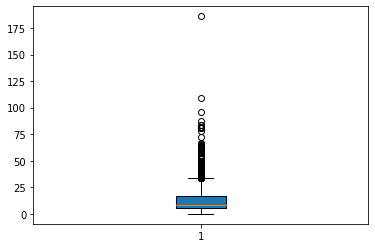

In [6]:
plt.boxplot(df['Color'], vert = True, patch_artist = True)

In [7]:
df['Color'].isnull().sum()

0

#### IQR approach to treat the outliers 

In [8]:
Q1 = df['Color'].quantile(0.25)
Q3 = df['Color'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['Color'] >= Q1 - 1.5*IQR) & (df['Color'] <= Q3 + 1.5*IQR)
df.loc[filter]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73857,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,3.0,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,59658.0
73858,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,NaN,Specific Gravity,BIAB,0.50,22.00,NaN,NaN,NaN
73859,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,17.00,sucrose,140 g,82450.0


In [9]:
filter.shape

(73861,)

In [10]:
import numpy as np

In [33]:
data = np.array(df['Color'])

In [34]:
data

array([ 4.83, 15.64,  8.98, ...,  3.63, 14.12,  8.65])

#### Grubb's test to detect outliers

In [35]:
from outliers import smirnov_grubbs as grubbs

In [36]:
grubbs.test(data, alpha = 0.05)

array([ 4.83, 15.64,  8.98, ...,  3.63, 14.12,  8.65])

In [41]:
data = grubbs.max_test(data, alpha = 0.05)
data

array([ 4.83, 15.64,  8.98, ...,  3.63, 14.12,  8.65])

In [38]:
grubbs.max_test_indices(data, alpha = 0.05)


[1325, 1744, 3756, 4194, 4374, 5272, 4347, 4587, 3984, 6081, 5207, 4632]

In [21]:
grubbs.max_test_outliers(data, alpha = 0.05)

[186.0,
 108.65,
 95.59,
 87.37,
 83.96,
 83.43,
 81.66,
 81.62,
 80.4,
 80.4,
 78.27,
 72.47]

In [23]:
grubbs.min_test(data, alpha = 0.05).shape

(73861,)

In [24]:
grubbs.min_test_outliers(data, alpha = 0.05)

[]

#### QQ plot to check normality

In [26]:
from scipy import stats

((array([-4.27901852, -4.0772794 , -3.96744299, ...,  3.96744299,
          4.0772794 ,  4.27901852]),
  array([ 0.  ,  0.  ,  0.  , ..., 65.02, 66.03, 66.38])),
 (10.536772586228757, 13.392003818602829, 0.8856889174388274))

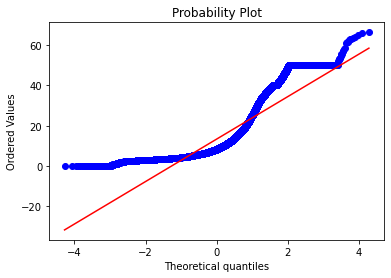

In [45]:
stats.probplot(data, dist = 'norm', plot = plt)

In [58]:
import random

In [59]:
x = [random.normalvariate(0,1) for _ in range(1000)]

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

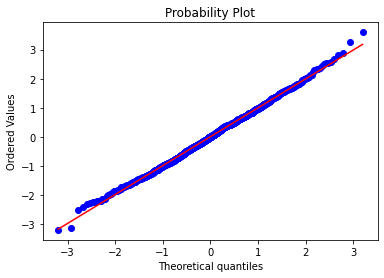

In [60]:
stats.probplot(x, dist = 'norm', plot = plt)

#### shakiro-wilk test to check normality

In [53]:
from scipy.stats import shapiro

In [56]:
stat, p = shapiro(x)

In [57]:
print('stat = %.3f, p = %.3f\n' % (stat,p)) #failed to  reject NULL as p>0.05 and it is normal dist.

stat = 0.998, p = 0.319



In [66]:
stat, p = shapiro(data[:1000])

In [67]:
print('stat = %.3f, p = %.3f\n' % (stat,p)) # p<0.05, reject the NULL and it is not normal dist.

stat = 0.793, p = 0.000



In [68]:
from sklearn.cluster import DBSCAN

In [82]:
outlier = DBSCAN(min_samples = 5, eps = 3)
cluster = outlier.fit_predict(data[:4000].reshape(-1,1))
list(cluster).count(-1)

5

In [84]:
import scipy as sp

In [88]:
def mahalanobis(x = None, data = None, cov = None):
    x_minus_m = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_m, inv_covmat)
    mahala = np.dot(left_term, x_minus_m.T)
    return mahala.diagonal()

df_x = df[['OG', 'FG', 'ABV', 'IBU', 'Color']].head(500)
df_x['mahalanobis'] = mahalanobis(x = df_x, data = df[['OG', 'FG', 'ABV', 'IBU', 'Color']])
df_x.head(100)

,OG,FG,ABV,IBU,Color,mahalanobis
BeerID,,,,,,
1,1.055,1.013,5.48,17.65,4.83,0.874493
2,1.083,1.021,8.16,60.65,15.64,1.203356
3,1.063,1.018,5.91,59.25,8.98,0.317087
4,1.061,1.017,5.80,54.48,8.50,0.284583
5,1.060,1.010,6.48,17.84,4.57,1.245849
...,...,...,...,...,...,...
96,1.056,1.012,5.73,26.51,9.94,0.267192
97,1.058,1.015,5.73,42.52,5.60,0.453585
98,1.055,1.014,5.43,16.73,2.84,1.156753


In [91]:
#critical values for n=4 degree of freedom
from scipy.stats import chi2
chi2.ppf((1-.01), df = 4)

13.276704135987622

In [89]:
#compute p-values
df_x['p-value'] = 1 - chi2.cdf(df_x['mahalanobis'], 4)

In [94]:
#extreme values with alpha = 0.01
df_x.loc[df_x['p-value'] < 0.01]

,OG,FG,ABV,IBU,Color,mahalanobis,p-value
BeerID,,,,,,,
7,1.0720,1.01800,7.09,268.71,6.33,28.871438,8.301830e-06
38,13.9618,3.48530,5.65,37.62,4.96,33.765486,8.324381e-07
148,1.1240,1.02400,13.24,69.09,40.00,16.119407,2.863052e-03
155,1.1300,1.03600,12.35,114.57,40.00,13.386854,9.532382e-03
257,1.1890,1.03800,19.85,165.28,6.79,60.483700,2.295497e-12
273,15.0428,3.75321,6.11,87.20,8.08,41.242372,2.394485e-08
274,13.1874,3.61072,5.15,29.06,22.65,35.591782,3.510796e-07
282,1.1560,1.03100,16.38,0.00,6.74,41.840650,1.799970e-08
286,1.0980,1.00500,12.22,0.00,4.29,17.780245,1.362293e-03
